# Ejercicio3: 
Se desea conocer si el nivel de morosidad que presenta una entidad varía en función del número de oficinas que tiene una entidad. Para ello, se seleccionan diversas entidades en función del número de oficinas que presentan: bajo (1), medio (2), alto (3). Investigue, con un nivel de confianza del 95%, si el nivel de morosidad que presenta una entidad varía significativamente en función del número de oficinas que posee. Identifique en qué caso se eleva significativamente el nivel de morosidad.

In [2]:
#Del módulo pandas importamos la funcion "read_csv" para poder importar los archivos cargados a un dataframe que permita su manipulación
from pandas import read_csv
mor=read_csv('morosidad.csv', sep=';')
print(mor)

    group  data
0       1  1996
1       1  3336
2       1  1776
3       1  2639
4       1  2627
5       1  2605
6       1  2807
7       1  1098
8       1  2638
9       1  1918
10      1  2957
11      1  2123
12      1  1143
13      1  1540
14      1  2607
15      1  2680
16      1  2404
17      1  2153
18      1  2168
19      1  1693
20      2  2211
21      2  3424
22      2  2182
23      2  3119
24      2  1652
25      2  2167
26      2  2384
27      2  2677
28      2  1357
29      2  2043
30      3  2106
31      3  2196
32      3  1448
33      3  2099
34      3  2915
35      3  1892
36      3  2220
37      3  2084
38      3  2179
39      3  2247
40      3  1496
41      3  2582
42      3  3186
43      3  1665


**Primer paso**: analice gráficamente y a nivel de estadística descriptiva el comportamiento de la variable para cada grupo.

<AxesSubplot: xlabel='group', ylabel='data'>

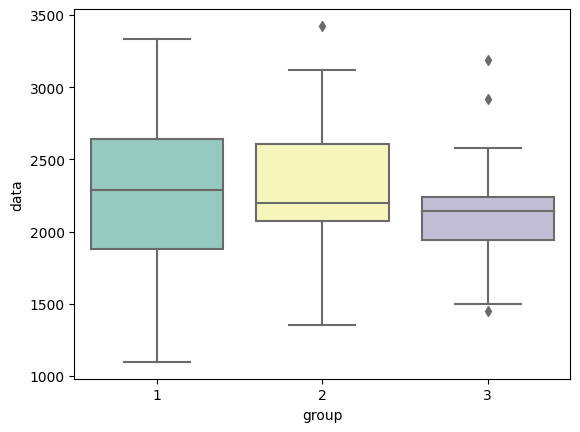

In [3]:
from seaborn import boxplot
boxplot(x="group", y="data", data=mor, palette="Set3")

In [4]:
#Estadisticos descriptivos
G1 = mor['data'][mor['group'] == 1]
G2 = mor['data'][mor['group'] == 2]
G3 = mor['data'][mor['group'] == 3]

print('G1:',[G1.mean(), G1.std()])
print('G2:',[G2.mean(), G2.std()]) 
print('G3:',[G3.mean(), G3.std()])

G1: [2245.4, 593.5501929735575]
G2: [2321.6, 623.0206345789127]
G3: [2165.3571428571427, 487.56153176060485]


**Segundo paso:** Genere el modelo a evaluar y obtenga los residuales que posteriormente serán utilizados para probar la hipótesis de distribución normal. Puede modificar los nombres del modelo "model_bie" la variable dependiente "data" y la variable de agrupación o independiente "group".

Aunque es necesario evaluar los supuestos del modelo, antes de concluir algo del ANOVA, observamos que de manera preliminar se rechaza la hipótesis que las medias de las poblaciones sean iguales.

Contraste de hipótesis de la prueba ANOVA
*   H0: Todas las poblaciones tienen el mismo promedio en valor (p > 0.05)
*   H1: Al menos una de las medias de las poblaciones en valor es diferente del resto (p ≤ 0.05)

Si se cumplen los supuestos del ANOVA (homogeneidad de varianzas y normalidad en residuales, véase más abajo su comprobación), podemos interpretar el resultado del ANOVA. En este caso, el ANOVA tiene un valor del estadístico de contraste F(2,27)=9.47, con un p-valor asociado de 0.0008. Como el p-valor es menor de 0.05, rechazamos Ho. Por lo tanto, podemos concluir que al menos una de las medias poblacionales en gasto es diferente al resto de grupos. 

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model_mor = ols('data ~ C(group)', data=mor).fit()
anova_table = sm.stats.anova_lm(model_mor, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(group),1.448378e+05,2.0,0.223626,0.800583
Residual,1.327744e+07,41.0,NaN,NaN


**Tercer paso:** Evaluar supuestos (homogeneidad de varianzas y normalidad en residuales)

**Nota:** Recuerden que hay módulos que no vienen preinstalados, por lo que es necesario instalarlos siempre que los vayamos a utilizar, es el caso de este módulo llamado "pingouin", módulo de análisis estadístico que tiene la ventaja, en relación contra otros módulos, de permitir el ingreso de los datos en columnas.

**Homocedasticidad (homogeneidad de varianzas):** Para este caso utilizamos la prueba de Levene.


**Recuerden:**

Contraste de hipótesis de la prueba de Levene
*   H0: Las varianzas de los grupos evaluados son homogéneas (pval > 0.05)
*   H1: Al menos una de las varianzas de las poblaciones evaluadas es diferente del resto (pval ≤ 0.05)

En este caso observamos en la prueba de Levene un p-valor=0.55, mayor de 0.05. Por lo tanto, no existe evidencia para rechazar Ho y asumimos que existe homogeneidad de varianzas.



In [10]:
from pingouin import homoscedasticity
homoscedasticity(mor, dv='data', group='group', method='levene', alpha=0.05)

,W,pval,equal_var
levene,0.700859,0.502005,True


**Distribución normal de residuales:** Del modelo evaluado con la función "ols" y al que denominamos "model_bie", extraemos su residuales y evaluamos el supuesto de distribución normal.

**Recuerden:**

Contraste de hipótesis de la prueba de Shapiro-Wilk
*   H0: Los residuales se comportan como una distribución normal (p ≥ 0.05)
*   H1: Los residuales NO se comportan como una distribución normal (p < 0.05)

En este caso, la prueba de Shapiro Wilk sobre residuales da un p-valor=0.667, mayor de 0.05. Por lo tanto, no existe evidencia para rechazar Ho y asumimos que existe normalidad en residuales.

In [7]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model_mor.resid)
print(w, pvalue)

0.9799985289573669 0.6335203647613525


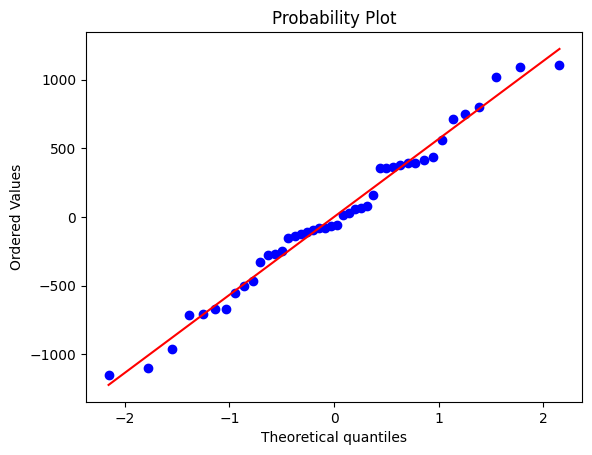

In [8]:
# QQ-plot
#Importar módulos a utilizar
from matplotlib import pyplot
from scipy.stats import probplot
from matplotlib.pyplot import show

#Gráfico de normalidad
probplot(model_mor.resid, dist="norm", plot=pyplot)
show()


El gráfico de normalidad soabre residuales también indica existencia de normalidad. En este caso, los puntos siguen bastante bien la línea diagonal. 

**Cuarto paso:** Una vez comprobado que se cumplen los supuestos de normalidad en residuales y homogeneidad de varianzas, podemos interpretar los resultados del ANOVA de 1 factor (véase su interpretación en el segundo paso). Como se rechaza Ho del ANOVA, con el objetivo de identificar entre qué grupos se encuentran las diferencias significativas, haremos comparaciones entre grupos 2 a 2. Para la realización de las comparaciones múltiples, se deberá elegir el procedimiento de corrección deseado. En este caso, a modo ilustrativo, mostramos los resultados de aplicar la corrección de Bonferroni y de Tukey. En la práctica, con aplicar un único procedimiento sería suficiente.  

**Bonferroni:** En la tabla de abajo se muestran los valores de p corregidos por el método de Bonferroni (columna pval_corr) para cada comparación de medias entre grupos. Se muestran los resultados de comparación entre el grupo 1 con el 2 (fila1), el 1 con el 3 (fila2) y el grupo 2 con el 3 (fila 3). En este caso, compararemos lo obtenido en cada comparación el nivel de significación. No se encuentran diferencias significativas entre el grupo 1 y 2 (p-valor_corr > 0.05) y sí existen diferencias significativas entre el grupo 3 con el resto (p-valores_corr ≤ 0.05). Por ello, concluimos que el grupo que difiere significativamente en gasto del resto es el grupo 3 (ocio). Mirando las medias, vemos que es el grupo que presenta significativamente el menor nivel de gasto. En los grupos 1 y 2 se produce significativamente el mayor nivel de gasto con respecto al grupo 3 (no podemos distinguir entre los grupos 1 y 2 quién presenta el mayor nivel de gasto, ya que no existe evidencia para decir que existen diferencias entre ellos -no rechazamos Ho en la comparación entre los grupos 1 y 2-). Sería recomendable completar estos resultados con medidas del tamaño del efecto (d de Cohen) para cada comparación entre grupos 2 a 2. Esto nos ayudaría a determinar la relevancia de las diferencias encontradas.

In [9]:
import scipy.stats as stats
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(mor['data'], mor['group'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "bonf")

tbl

group1,group2,stat,pval,pval_corr,reject
1,2,-0.3262,0.7467,1.0,False
1,3,0.4154,0.6806,1.0,False
2,3,0.6898,0.4975,1.0,False
